# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd
                
data = pd.read_pickle('corpus.pkl')
data

C:\Users\tanis\AppData\Local\Temp\ipykernel_29208\1579463591.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,transcript,transcript_cleaned,full_name
comedian,,,
ali,"Ladies and gentlemen, please welcome to the st...",Ladies and gentlemen please welcome to the sta...,Ali Wong
anthony,,,Anthony Jeselnik
beth,,,Beth Stelling
bill,"[cheers and applause] All right, thank you! Th...",All right thank you Thank you very much Thank...,Bill Burr
bo,\n\n\nEnter your e-mail\n\n I accept the priva...,Enter your email I accept the privacy policy ...,Bo Burnham
dylan,Dylan Moran’s What It Is (2009) offers a sweep...,Dylan Morans What It Is offers a sweeping exp...,Dylan Moran
george,George Carlin: I’m Glad I’m Dead (2024) is a c...,George Carlin Im Glad Im Dead is a controvers...,George Carlin
hasan,\n\n\nEnter your e-mail\n\n I accept the priva...,Enter your email I accept the privacy policy ...,Hasan Minhaj
joe,,,Joe Rogan


In [3]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
import textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

ModuleNotFoundError: No module named 'textblob'

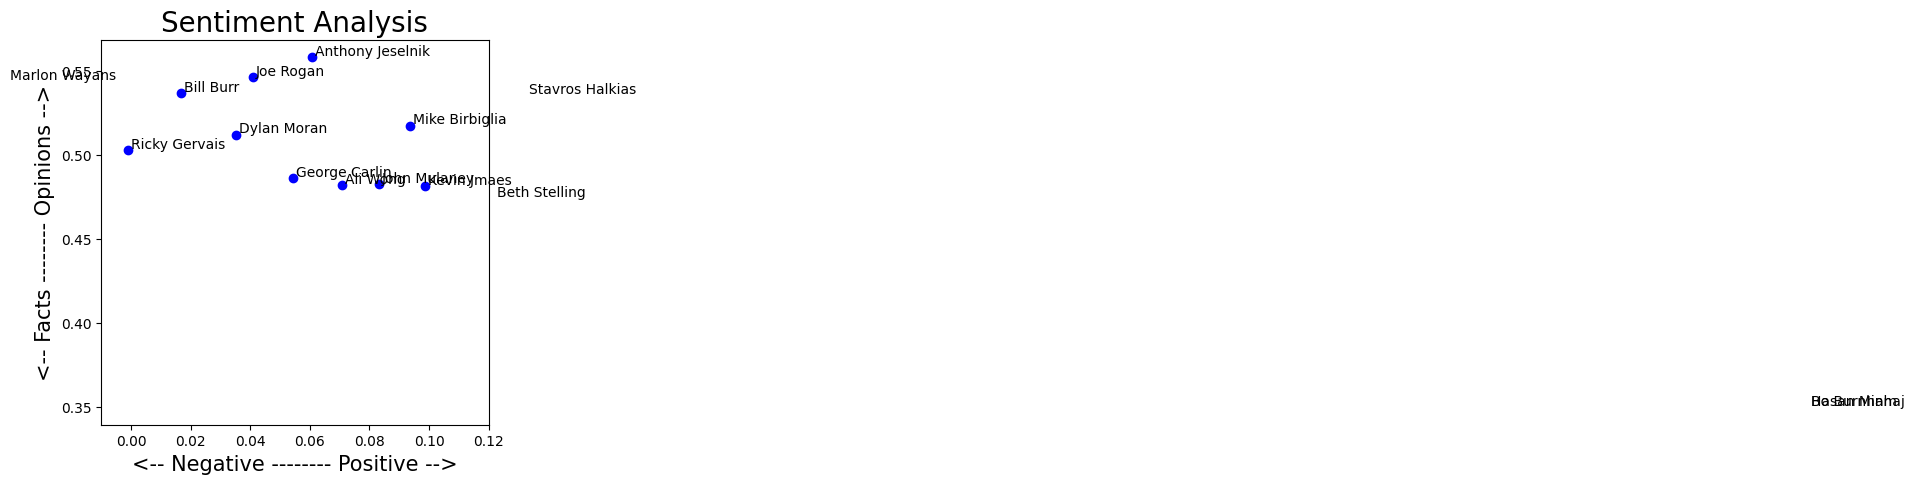

In [4]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [5, 5]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)  #subjectivity
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)     #polarity

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [5]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [6]:
# Let's take a look at our data again
data

,transcript,transcript_cleaned,full_name,polarity,subjectivity
comedian,,,,,
ali,"Ladies and gentlemen, please welcome to the st...",Ladies and gentlemen please welcome to the sta...,Ali Wong,0.070805,0.482205
anthony,"Thank you. Thank you. Thank you, San Francisco...",Thank you Thank you Thank you San Francisco Th...,Anthony Jeselnik,0.060719,0.558299
beth,"Beth Stelling’s stand-up comedy special, “Girl...",Beth Stellings standup comedy special Girl Dad...,Beth Stelling,0.121784,0.474403
bill,"[cheers and applause] All right, thank you! Th...",All right thank you Thank you very much Thank...,Bill Burr,0.016865,0.536978
bo,\n\nEnter your e-mail\n\n I accept the privacy...,Enter your email I accept the privacy policy ...,Bo Burnham,0.562500,0.350000
dylan,Dylan Moran’s What It Is (2009) offers a sweep...,Dylan Morans What It Is offers a sweeping exp...,Dylan Moran,0.035198,0.512299
george,George Carlin: I’m Glad I’m Dead (2024) is a c...,George Carlin Im Glad Im Dead is a controvers...,George Carlin,0.054509,0.486264
hasan,\n\nEnter your e-mail\n\n I accept the privacy...,Enter your email I accept the privacy policy ...,Hasan Minhaj,0.562500,0.350000
joe,[rock music playing] [audience cheering] [anno...,Ladies and gentlemen welcome Joe Rogan Wha...,Joe Rogan,0.040800,0.546358


In [7]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through. And then, when they go to sleep, they just go to

In [31]:
# The list has 15 elements, one for each transcript
len(list_pieces)

15

In [9]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [10]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.10982341269841271,
  0.07011794532627867,
  0.0676048790179225,
  0.1006832611832612,
  -0.042106537530266344,
  0.15212721992995432,
  0.03777319719753929,
  0.1122005091344714,
  0.013920043163464218,
  0.09165516448125142],
 [0.14799361949964365,
  -0.10444518716577542,
  -0.009731980223783514,
  0.03688446969696969,
  0.13267337237925475,
  0.1308717357910906,
  0.10545592705167174,
  -0.02606452726017943,
  0.030305395879166367,
  0.15567392676767675],
 [0.1414116575591985,
  0.15122519841269844,
  0.049290148508898485,
  0.12229225023342671,
  0.12169995408631776,
  0.09224576271186444,
  0.13687600644122383,
  0.10821006561572602,
  0.12482993197278909,
  0.15838477366255146],
 [-0.032260689190037016,
  0.003301963736746346,
  0.034964705969860614,
  0.020883488676856007,
  -0.05097013552895906,
  0.10210267356100688,
  0.01893112674362673,
  -0.03218448837868481,
  -0.011281239446133065,
  0.11028679653679659],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.1, 0.0],
 [0.080270

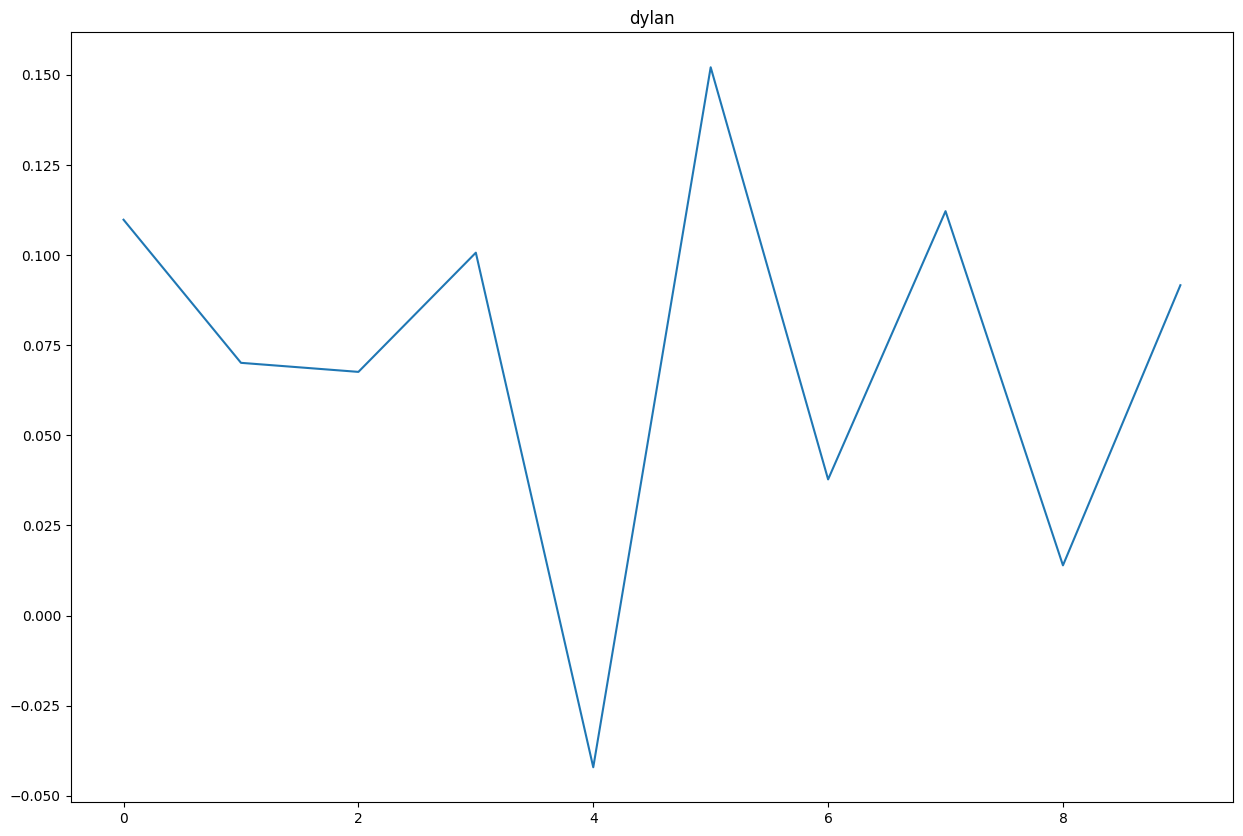

In [32]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[5])
plt.show()

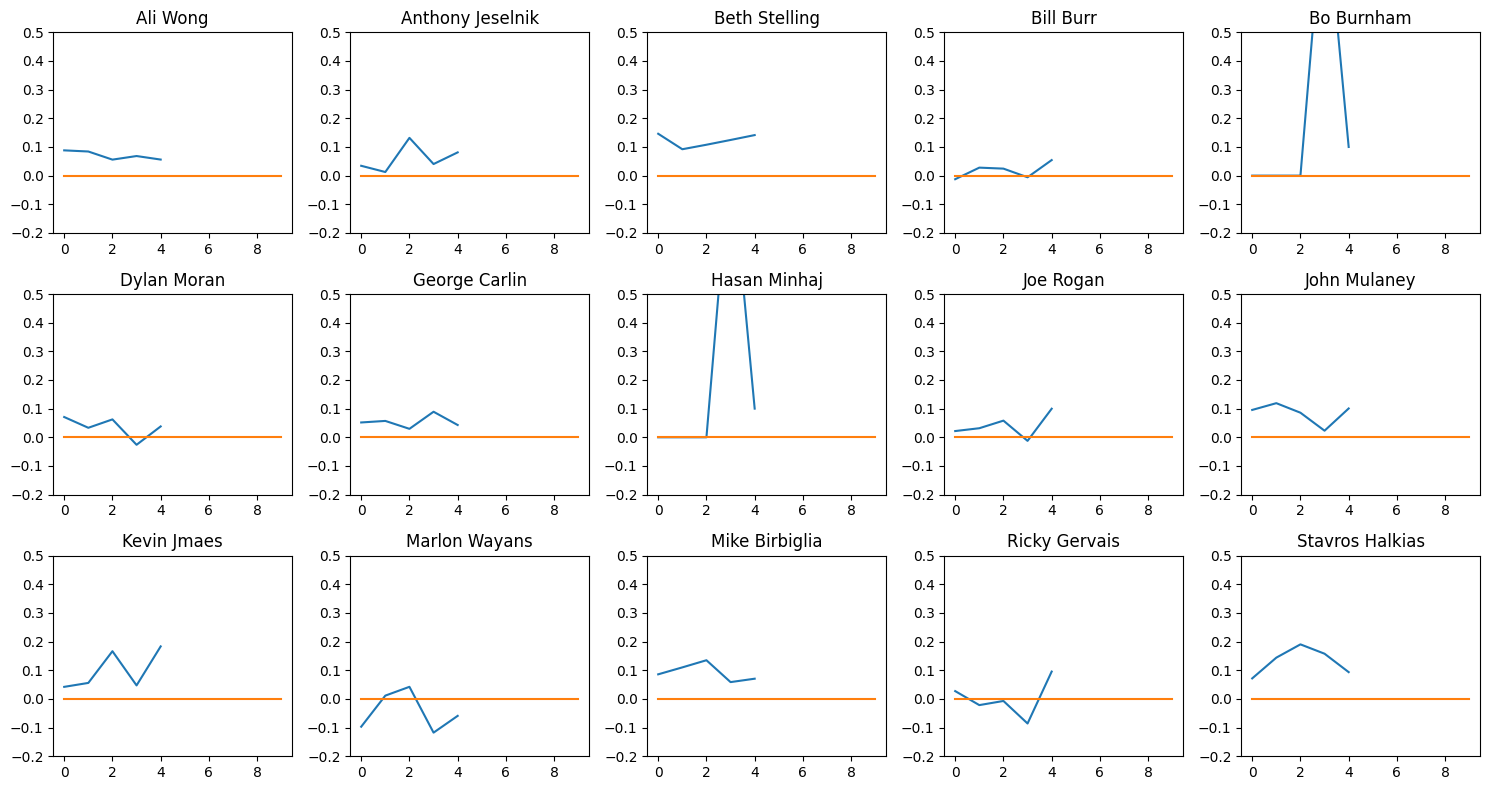

In [56]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [15, 8]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 5, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.5)

plt.tight_layout()
plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from textblob import TextBlob

In [14]:
# Read in the corpus
data = pd.read_pickle('corpus.pkl')

In [15]:
data

,transcript,transcript_cleaned,full_name
comedian,,,
ali,"Ladies and gentlemen, please welcome to the st...",Ladies and gentlemen please welcome to the sta...,Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Thank you Thank you Thank you San Francisco Th...,Anthony Jeselnik
beth,"Beth Stelling’s stand-up comedy special, “Girl...",Beth Stellings standup comedy special Girl Dad...,Beth Stelling
bill,"[cheers and applause] All right, thank you! Th...",All right thank you Thank you very much Thank...,Bill Burr
bo,\n\nEnter your e-mail\n\n I accept the privacy...,Enter your email I accept the privacy policy ...,Bo Burnham
dylan,Dylan Moran’s What It Is (2009) offers a sweep...,Dylan Morans What It Is offers a sweeping exp...,Dylan Moran
george,George Carlin: I’m Glad I’m Dead (2024) is a c...,George Carlin Im Glad Im Dead is a controvers...,George Carlin
hasan,\n\nEnter your e-mail\n\n I accept the privacy...,Enter your email I accept the privacy policy ...,Hasan Minhaj
joe,[rock music playing] [audience cheering] [anno...,Ladies and gentlemen welcome Joe Rogan Wha...,Joe Rogan


In [16]:
# Define lambda functions for polarity and subjectivity
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [17]:
# Create empty lists to store polarity and subjectivity for each comedian
pol_list = []
sub_list = []

In [18]:
# Loop through each comedian to calculate polarity and subjectivity
for transcript in data['transcript']:
    pol_list.append(pol(transcript))
    sub_list.append(sub(transcript))

In [19]:
pol_list

[0.07080503027716033,
 0.06071938784085209,
 0.12178429108532032,
 0.016864576779759662,
 0.5625,
 0.035198203204739084,
 0.05450885000251424,
 0.5625,
 0.04080029229253222,
 0.08304261995981749,
 0.09856665914181256,
 -0.04158652349336277,
 0.09371531745137701,
 -0.0009033690611230852,
 0.13265943800795144]

In [20]:
sub_list

[0.4822049965354245,
 0.5582989994845236,
 0.474402547614383,
 0.5369779848533462,
 0.35,
 0.512298898391581,
 0.4862639484181194,
 0.35,
 0.5463581810309999,
 0.48293267890568986,
 0.48189183686116177,
 0.544105770989575,
 0.5176375589851433,
 0.5032491812999832,
 0.5355663178897376]

In [21]:
# Add polarity and subjectivity columns to the dataframe
data['polarity'] = pol_list
data['subjectivity'] = sub_list

In [22]:
# Plot overall sentiment analysis
plt.rcParams['figure.figsize'] = [10, 8]

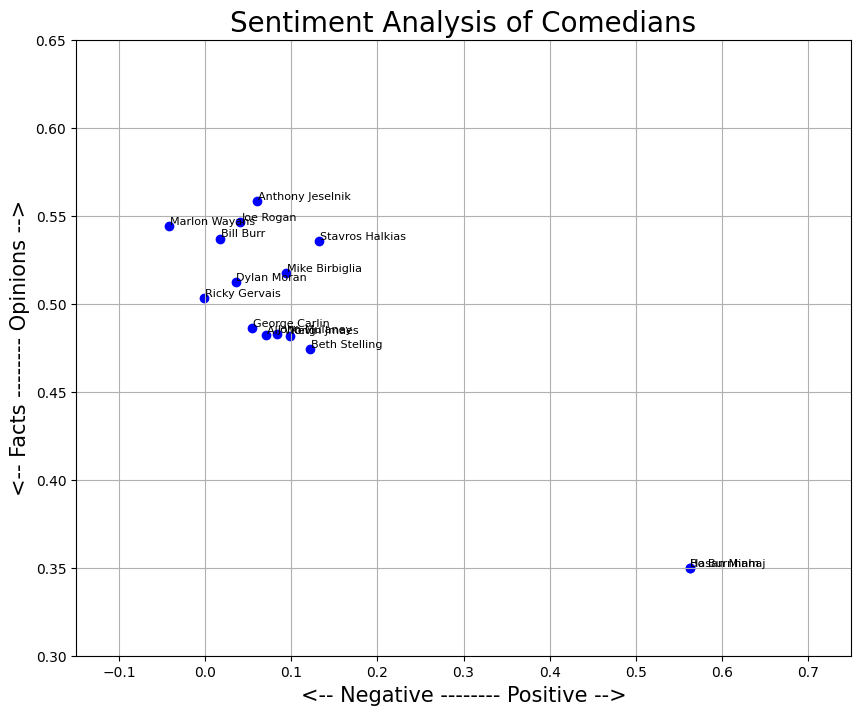

In [23]:
for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=8)
    plt.xlim(-0.15, 0.75) 
    plt.ylim(0.3, 0.65)

plt.title('Sentiment Analysis of Comedians', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)  #subjectivity
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)     #polarity
plt.grid(True)
plt.show()

In [33]:
# Classify based on average polarity and subjectivity

# creates a new column
# checks the average polarity value and assigns the label 'positive' if the value is greater than 0.05, otherwise 'negative'.
# positive or negative sentiment based on their average polarity score.
data['polarity_label'] = ['positive' if x > 0.05 else 'negative' for x in data['polarity']]

# creates another new column in the dataset called 'subjectivity_label'.
#  it evaluates the average subjectivity value and labels as 'subjective' if the value is greater than 0.5, and 'objective' otherwise. 
# subjective or objective based on their average subjectivity score.
data['subjectivity_label'] = ['subjective' if x > 0.5 else 'objective' for x in data['subjectivity']]


print(data[['polarity_label', 'subjectivity_label']])

         polarity_label subjectivity_label
comedian                                  
ali            positive          objective
anthony        positive         subjective
beth           positive          objective
bill           negative         subjective
bo             positive          objective
dylan          negative         subjective
george         positive          objective
hasan          positive          objective
joe            negative         subjective
john           positive          objective
kevin          positive          objective
marlon         negative         subjective
mike           positive         subjective
ricky          negative         subjective
stavros        positive         subjective


In [24]:
# Split each routine into sections
def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts.'''
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [25]:
# Create a list to hold all sections of text for each comedian
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

In [26]:
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through. And then, when they go to sleep, they just go to

In [27]:
# Calculate polarity for each section of text
pol_transcript = []
for lp in list_pieces:
    pol_piece = []
    for p in lp:
        pol_piece.append(TextBlob(p).sentiment.polarity)
    pol_transcript.append(pol_piece)

In [28]:
pol_transcript

[[0.10982341269841271,
  0.07011794532627867,
  0.0676048790179225,
  0.1006832611832612,
  -0.042106537530266344,
  0.15212721992995432,
  0.03777319719753929,
  0.1122005091344714,
  0.013920043163464218,
  0.09165516448125142],
 [0.14799361949964365,
  -0.10444518716577542,
  -0.009731980223783514,
  0.03688446969696969,
  0.13267337237925475,
  0.1308717357910906,
  0.10545592705167174,
  -0.02606452726017943,
  0.030305395879166367,
  0.15567392676767675],
 [0.1414116575591985,
  0.15122519841269844,
  0.049290148508898485,
  0.12229225023342671,
  0.12169995408631776,
  0.09224576271186444,
  0.13687600644122383,
  0.10821006561572602,
  0.12482993197278909,
  0.15838477366255146],
 [-0.032260689190037016,
  0.003301963736746346,
  0.034964705969860614,
  0.020883488676856007,
  -0.05097013552895906,
  0.10210267356100688,
  0.01893112674362673,
  -0.03218448837868481,
  -0.011281239446133065,
  0.11028679653679659],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.1, 0.0],
 [0.080270

ValueError: keyword grid_spacing is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

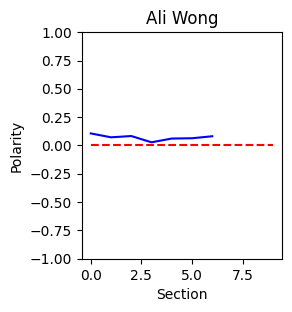

In [72]:
# Plot the sentiment over time for each comedian
plt.rcParams['figure.figsize'] = [15, 10]

for i, comedian in enumerate(data.index):
    plt.subplot(3, 5, i+1)
    plt.plot(polarity_transcript[i], color='blue')
    plt.plot(np.arange(0,10), np.zeros(10), color='red', linestyle='--')
    plt.title(data['full_name'][i])
    plt.ylim(-1, 1)
    plt.xlabel('Section')
    plt.ylabel('Polarity')
    plt.grid(True, spacing=1)

plt.tight_layout()
plt.show()

In [62]:
# Classify based on average polarity and subjectivity

# creates a new column
# checks the average polarity value and assigns the label 'positive' if the value is greater than 0.05, otherwise 'negative'.
# positive or negative sentiment based on their average polarity score.
data['polarity_label'] = ['positive' if x > 0.05 else 'negative' for x in data['polarity']]

# creates another new column in the dataset called 'subjectivity_label'.
#  it evaluates the average subjectivity value and labels as 'subjective' if the value is greater than 0.5, and 'objective' otherwise. 
# subjective or objective based on their average subjectivity score.
data['subjectivity_label'] = ['subjective' if x > 0.5 else 'objective' for x in data['subjectivity']]


print(data[['polarity_label', 'subjectivity_label']])

         polarity_label subjectivity_label
comedian                                  
ali            positive          objective
anthony        positive         subjective
beth           positive          objective
bill           negative         subjective
bo             positive          objective
dylan          negative         subjective
george         positive          objective
hasan          positive          objective
joe            negative         subjective
john           positive          objective
kevin          positive          objective
marlon         negative         subjective
mike           positive         subjective
ricky          negative         subjective
stavros        positive         subjective


# findings
1. bo burnham and hasan minhaj have a positive polarity peak at the end of their routine. this could mean that they end their show at a positive note (reaching climax) while their rest of the routine is neutral.
2. george calin, beth steling have a neutral tone and is unwavering throughout their routine.
3. joe rogan, dylan moran and bill burr have the most neutral comedy routine among the given the comedians

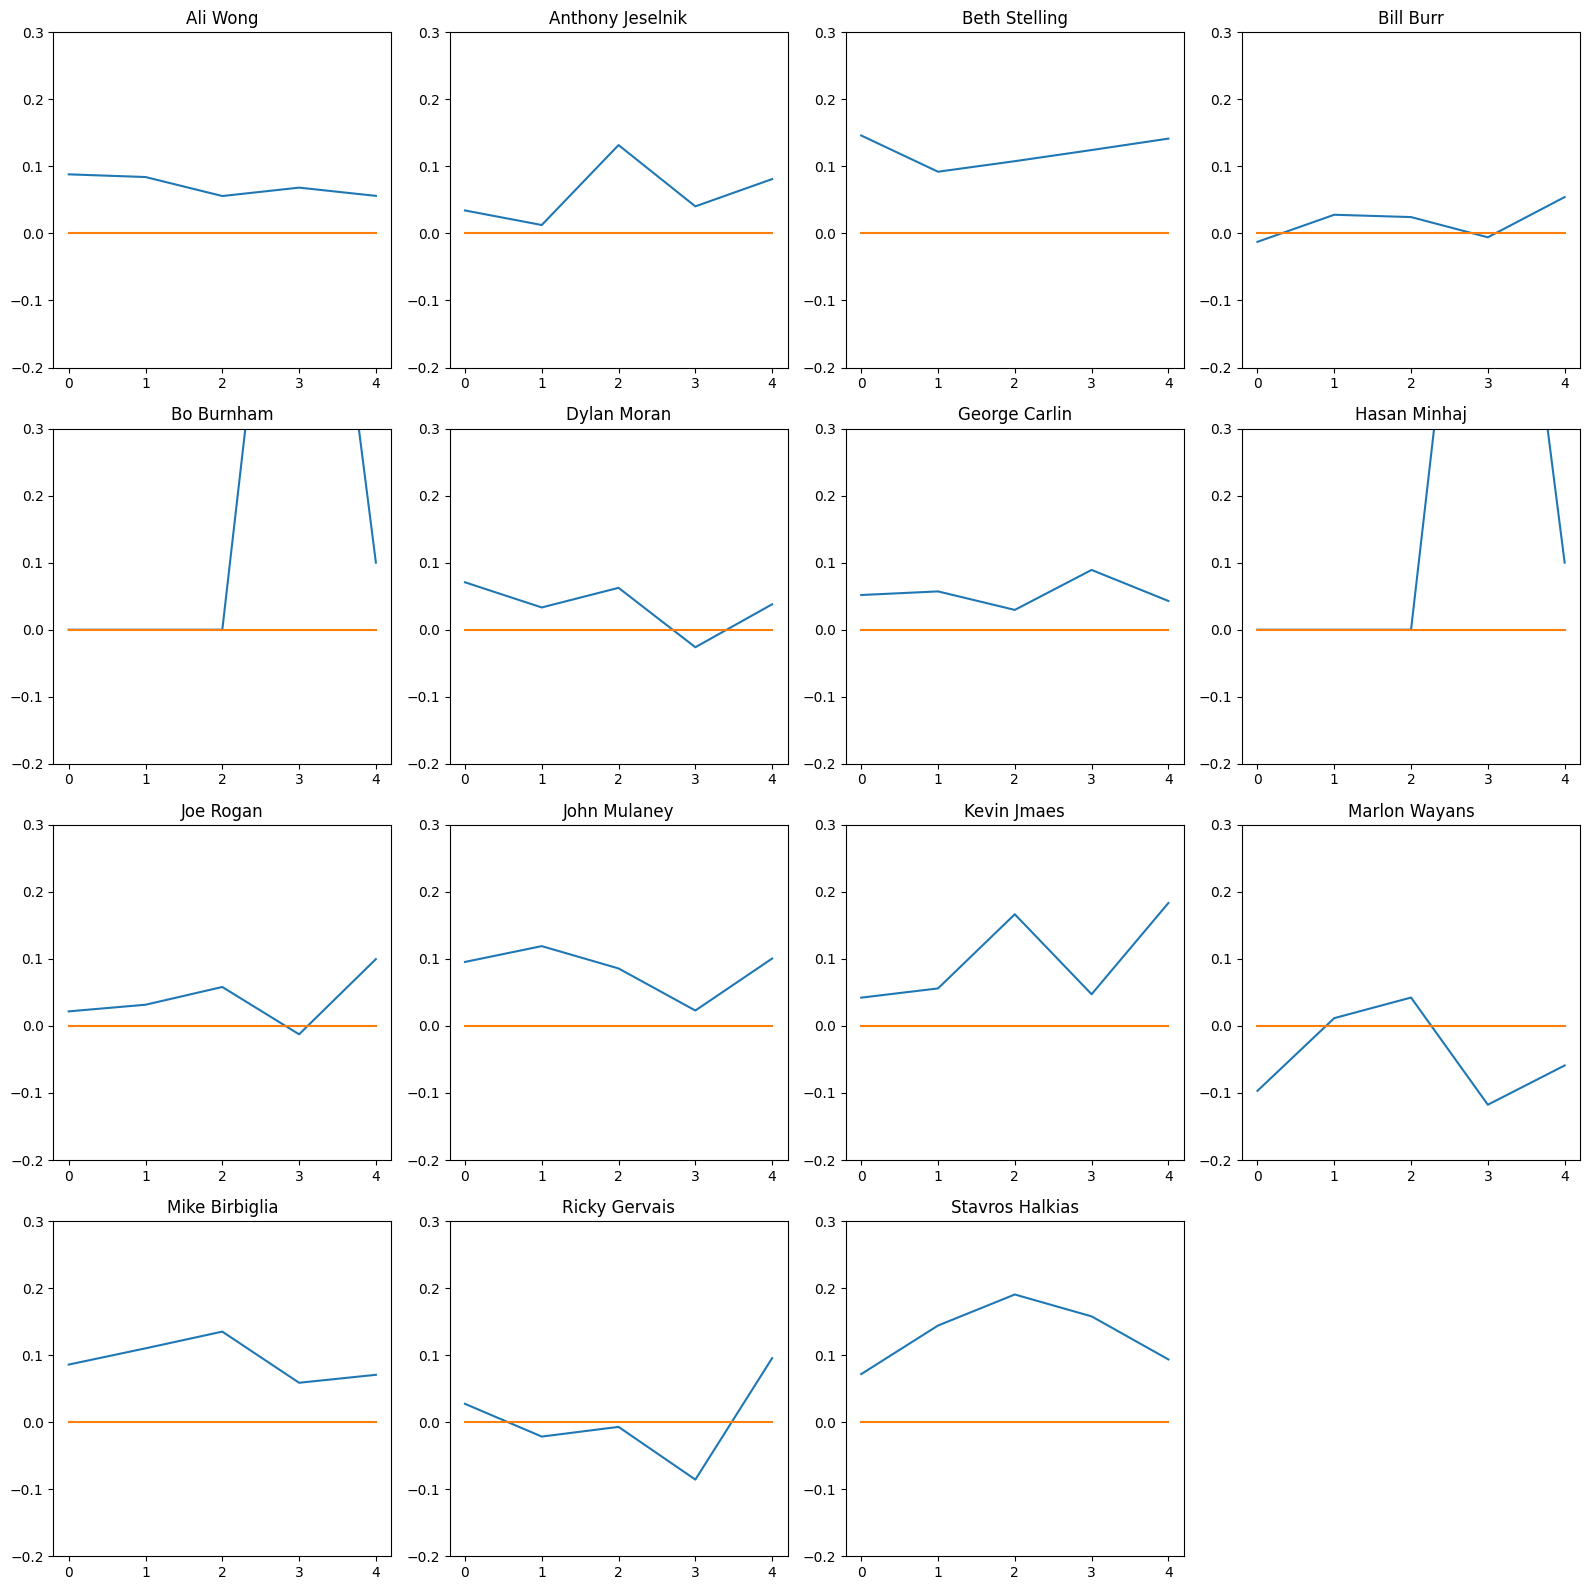

           0         1         2         3         4 sentiment
0   0.088166  0.084167  0.055826  0.068352  0.056044  Positive
1   0.034313  0.012580  0.131814  0.040403  0.081100  Positive
2   0.146109  0.092084  0.107798  0.124423  0.141451  Positive
3  -0.012504  0.027888  0.024424 -0.005745  0.054270  Negative
4   0.000000  0.000000  0.000000  1.000000  0.100000  Positive
5   0.070738  0.033179  0.062451 -0.026160  0.037905  Negative
6   0.051741  0.057127  0.029525  0.089158  0.042869  Positive
7   0.000000  0.000000  0.000000  1.000000  0.100000  Positive
8   0.021757  0.031646  0.058129 -0.012473  0.099721  Negative
9   0.095465  0.119067  0.085769  0.023010  0.100564  Positive
10  0.042234  0.055970  0.166605  0.047291  0.183409  Positive
11 -0.096809  0.011654  0.042359 -0.117500 -0.058952  Negative
12  0.085951  0.110175  0.135120  0.058818  0.070691  Positive
13  0.027410 -0.021435 -0.006992 -0.085604  0.095556  Negative
14  0.071747  0.144169  0.190495  0.157862  0.093620  P

In [48]:
# Let's split the text into 5 parts instead of 10
# initializes an empty list list_pieces that will store the split text pieces.
list_pieces = []

# terates through each transcript
for t in data.transcript:

    # transcript 't' is passed to a function or method named split_text() along with the parameter n=5. 
    # This function is presumably designed to split a given text into the number of parts is set to 5.
    split = split_text(t, n=5)  # Change the number here

    # esulting split text parts obtained from splitting the transcript 't' into 5 pieces 
    # are then added to the list_pieces list.
    list_pieces.append(split)

# Recalculate the polarity for each piece of text
# empty list named polarity_transcript that will store the polarity scores for each piece of text.
polarity_transcript = []

# lp in the list_pieces list. list_pieces likely contains segmented pieces of text or speech transcripts.
for lp in list_pieces:
    # polarity_piece to store the polarity scores for each individual segment
    polarity_piece = []

    # p in the current piece of text lp.
    for p in lp:

        # Sentiment polarity of the current segment p is calculated This score is then appended to the polarity_piece list.
        polarity_piece.append(TextBlob(p).sentiment.polarity)

    # he polarity_piece list, containing polarity scores for each segment, is appended to the polarity_transcript list. 
    polarity_transcript.append(polarity_piece)


plt.rcParams['figure.figsize'] = [16, 16]

num_comedians = len(data.index)
num_rows = (num_comedians // 4) + 1

for index, comedian in enumerate(data.index):    
    plt.subplot(num_rows, 4, index+1)

    # plots the sentiment polarity values for a specific index index from the polarity_transcript list.
    plt.plot(polarity_transcript[index])

    # plots a horizontal line at y=0 to represent the neutral sentiment. 
    # np.arange(0, 5) function creates an array from 0 to 4, 
    # and np.zeros(5) generates an array of zeroes of length 5. 
    # This line serves as a reference line for neutrality in the sentiment analysis plot.
    plt.plot(np.arange(0, 5), np.zeros(5))  # Adjust the range accordingly
    plt.title(data['full_name'].iloc[index])

    # This line sets the limits of the y-axis on the plot. The ymin=-0.2 and ymax=0.3 parameters specify the minimum and maximum values for the y-axis,
    plt.ylim(ymin=-0.2, ymax=0.3)
    
plt.tight_layout()
plt.show()



# Create a DataFrame for the polarity values
# polarity_df from the polarity_transcript list, which likely contains sentiment polarity values for different text segments.
polarity_df = pd.DataFrame(polarity_transcript)

# Classify each piece based on its polarity and subjectivity
#  calculates the mean polarity value for each text segment across columns (axis=1) and assigns a sentiment classification ('Positive', 'Neutral', or 'Negative') based on the mean polarity value.
polarity_df['sentiment'] = polarity_df.mean(axis=1).apply(lambda x: 'Positive' if x > 0.05 else ('Neutral' if x == 0 else 'Negative'))

# Calculate the subjectivity for each piece of text
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)

# Create a DataFrame for the subjectivity values
subjectivity_df = pd.DataFrame(subjectivity_transcript)

# Classify each piece based on its subjectivity
# alculates the mean subjectivity value for each text segment and assigns an opinion classification ('Fact' or 'Opinion') based on the mean subjectivity value.
subjectivity_df['opinion'] = subjectivity_df.mean(axis=1).apply(lambda x: 'Fact' if x > 0.5 else 'Opinion')

print(polarity_df)
print(subjectivity_df)

# Now you have two DataFrames: polarity_df and subjectivity_df, which contain the sentiment and opinion classifications for each piece of text, respectively.

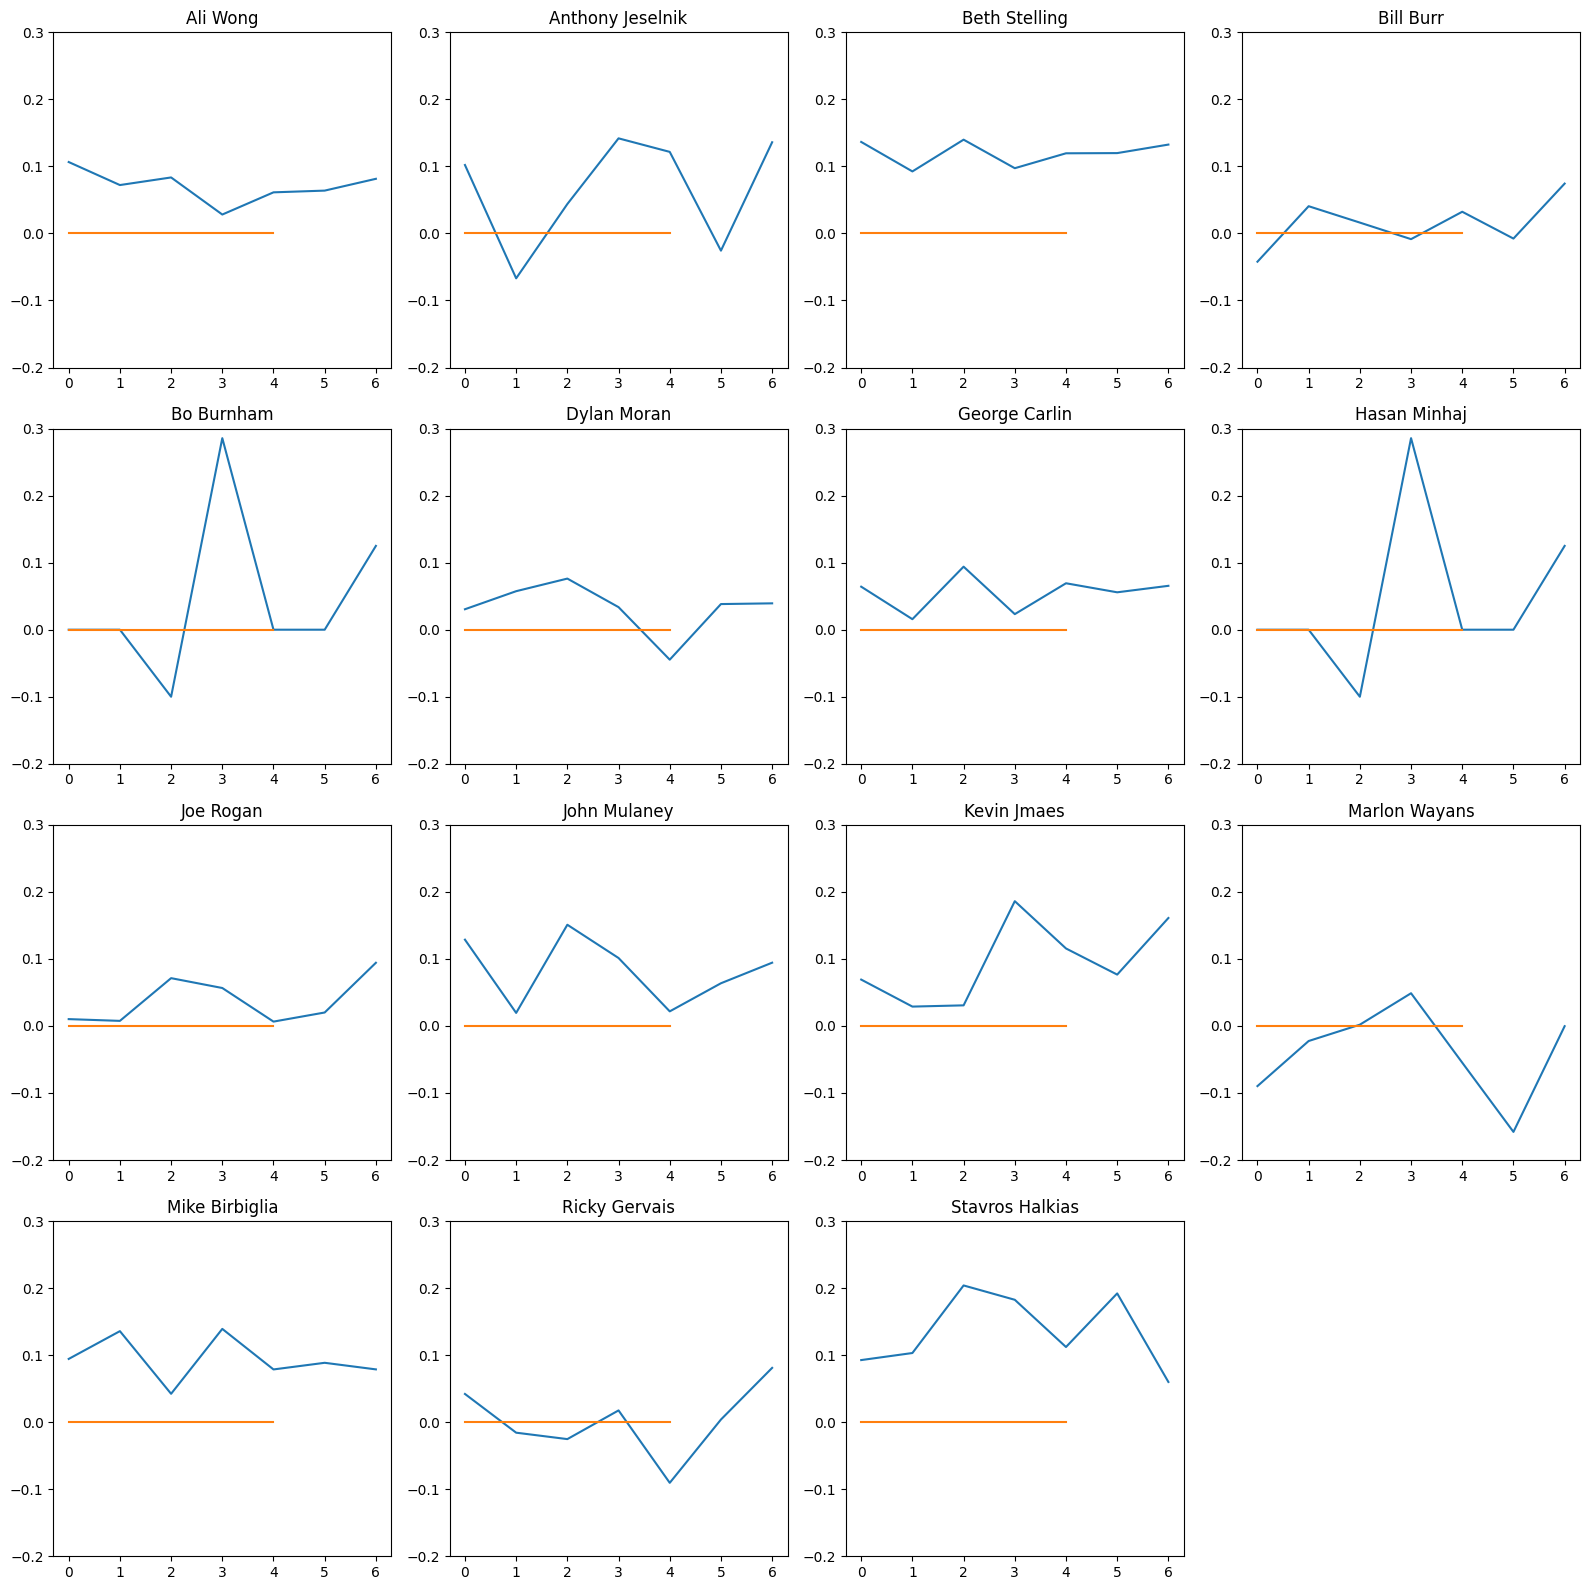

           0         1         2         3         4         5         6   
0   0.106528  0.072187  0.083539  0.028213  0.061324  0.063903  0.081505  \
1   0.102106 -0.066946  0.043902  0.141860  0.121672 -0.025658  0.136050   
2   0.136508  0.092527  0.139894  0.097325  0.119568  0.119854  0.132562   
3  -0.042149  0.040638  0.016199 -0.008495  0.032362 -0.007636  0.074369   
4   0.000000  0.000000 -0.100000  0.285714  0.000000  0.000000  0.125000   
5   0.030513  0.057447  0.076240  0.033639 -0.044713  0.038238  0.039315   
6   0.064161  0.015688  0.094011  0.023218  0.069266  0.055784  0.065453   
7   0.000000  0.000000 -0.100000  0.285714  0.000000  0.000000  0.125000   
8   0.010190  0.007572  0.071295  0.056604  0.006473  0.020066  0.094251   
9   0.128691  0.019455  0.150951  0.101339  0.021760  0.063679  0.094368   
10  0.069155  0.028877  0.030722  0.186131  0.115573  0.076603  0.161016   
11 -0.089721 -0.022469  0.001894  0.048800 -0.054739 -0.158036 -0.000344   
12  0.094383

In [61]:
# Let's split the text into 7 parts instead of 10
# initializes an empty list list_pieces that will store the split text pieces.
list_pieces = []

# terates through each transcript
for t in data.transcript:

    # transcript 't' is passed to a function or method named split_text() along with the parameter n=5. 
    # This function is presumably designed to split a given text into the number of parts is set to 5.
    split = split_text(t, n=7)  # Change the number here

    # esulting split text parts obtained from splitting the transcript 't' into 5 pieces 
    # are then added to the list_pieces list.
    list_pieces.append(split)

# Recalculate the polarity for each piece of text
# empty list named polarity_transcript that will store the polarity scores for each piece of text.
polarity_transcript = []

# lp in the list_pieces list. list_pieces likely contains segmented pieces of text or speech transcripts.
for lp in list_pieces:
    # polarity_piece to store the polarity scores for each individual segment
    polarity_piece = []

    # p in the current piece of text lp.
    for p in lp:

        # Sentiment polarity of the current segment p is calculated This score is then appended to the polarity_piece list.
        polarity_piece.append(TextBlob(p).sentiment.polarity)

    # he polarity_piece list, containing polarity scores for each segment, is appended to the polarity_transcript list. 
    polarity_transcript.append(polarity_piece)


plt.rcParams['figure.figsize'] = [16, 16]

num_comedians = len(data.index)
num_rows = (num_comedians // 4) + 1

for index, comedian in enumerate(data.index):    
    plt.subplot(num_rows, 4, index+1)

    # plots the sentiment polarity values for a specific index index from the polarity_transcript list.
    plt.plot(polarity_transcript[index])

    # plots a horizontal line at y=0 to represent the neutral sentiment. 
    # np.arange(0, 5) function creates an array from 0 to 4, 
    # and np.zeros(5) generates an array of zeroes of length 5. 
    # This line serves as a reference line for neutrality in the sentiment analysis plot.
    plt.plot(np.arange(0, 5), np.zeros(5))  # Adjust the range accordingly
    plt.title(data['full_name'].iloc[index])

    # This line sets the limits of the y-axis on the plot. The ymin=-0.2 and ymax=0.3 parameters specify the minimum and maximum values for the y-axis,
    plt.ylim(ymin=-0.2, ymax=0.3)
    
plt.tight_layout()
plt.show()


# Create a DataFrame for the polarity values
# polarity_df from the polarity_transcript list, which likely contains sentiment polarity values for different text segments.
polarity_df = pd.DataFrame(polarity_transcript)

# Classify each piece based on its polarity and subjectivity
#  calculates the mean polarity value for each text segment across columns (axis=1) and assigns a sentiment classification ('Positive', 'Neutral', or 'Negative') based on the mean polarity value.
polarity_df['sentiment'] = polarity_df.mean(axis=1).apply(lambda x: 'Positive' if x > 0.05 else ('Neutral' if x == 0 else 'Negative'))

# Calculate the subjectivity for each piece of text
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)

# Create a DataFrame for the subjectivity values
subjectivity_df = pd.DataFrame(subjectivity_transcript)

# Classify each piece based on its subjectivity
# alculates the mean subjectivity value for each text segment and assigns an opinion classification ('Fact' or 'Opinion') based on the mean subjectivity value.
subjectivity_df['opinion'] = subjectivity_df.mean(axis=1).apply(lambda x: 'Fact' if x > 0.5 else 'Opinion')

print(polarity_df)
print(subjectivity_df)

# Now you have two DataFrames: polarity_df and subjectivity_df, which contain the sentiment and opinion classifications for each piece of text, respectively.

# Findings
1. Bo burnham's polarity becomes negative when we take n=7, and in n=10, it is positive
2. the subjectivity doesnt change much when we change n from 10 to 7.